# LazyPredict for Regression

In [21]:
!pip install lazypredict

In [22]:
# Imports
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import load_diabetes
import numpy as np
import lazypredict

## Set random seed for reproducibility

In [23]:
SEED = 64

#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Data Loading

In [24]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add the target variable

In [25]:
df.shape

(442, 11)

In [26]:
# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information (column types, non-null values, etc.)
print(df.info())

# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

    age   sex   bmi    bp    s1    s2    s3    s4    s5    s6  target
0  0.04  0.05  0.06  0.02 -0.04 -0.03 -0.04 -0.00  0.02 -0.02  151.00
1 -0.00 -0.04 -0.05 -0.03 -0.01 -0.02  0.07 -0.04 -0.07 -0.09   75.00
2  0.09  0.05  0.04 -0.01 -0.05 -0.03 -0.03 -0.00  0.00 -0.03  141.00
3 -0.09 -0.04 -0.01 -0.04  0.01  0.02 -0.04  0.03  0.02 -0.01  206.00
4  0.01 -0.04 -0.04  0.02  0.00  0.02  0.01 -0.00 -0.03 -0.05  135.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    fl

In [27]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns if any
#print(df.describe(include='object'))

         age    sex    bmi     bp     s1     s2     s3     s4     s5     s6  \
count 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00   
mean   -0.00   0.00  -0.00  -0.00  -0.00   0.00  -0.00  -0.00   0.00   0.00   
std     0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   
min    -0.11  -0.04  -0.09  -0.11  -0.13  -0.12  -0.10  -0.08  -0.13  -0.14   
25%    -0.04  -0.04  -0.03  -0.04  -0.03  -0.03  -0.04  -0.04  -0.03  -0.03   
50%     0.01  -0.04  -0.01  -0.01  -0.00  -0.00  -0.01  -0.00  -0.00  -0.00   
75%     0.04   0.05   0.03   0.04   0.03   0.03   0.03   0.03   0.03   0.03   
max     0.11   0.05   0.17   0.13   0.15   0.20   0.18   0.19   0.13   0.14   

       target  
count  442.00  
mean   152.13  
std     77.09  
min     25.00  
25%     87.00  
50%    140.50  
75%    211.50  
max    346.00  


In [28]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


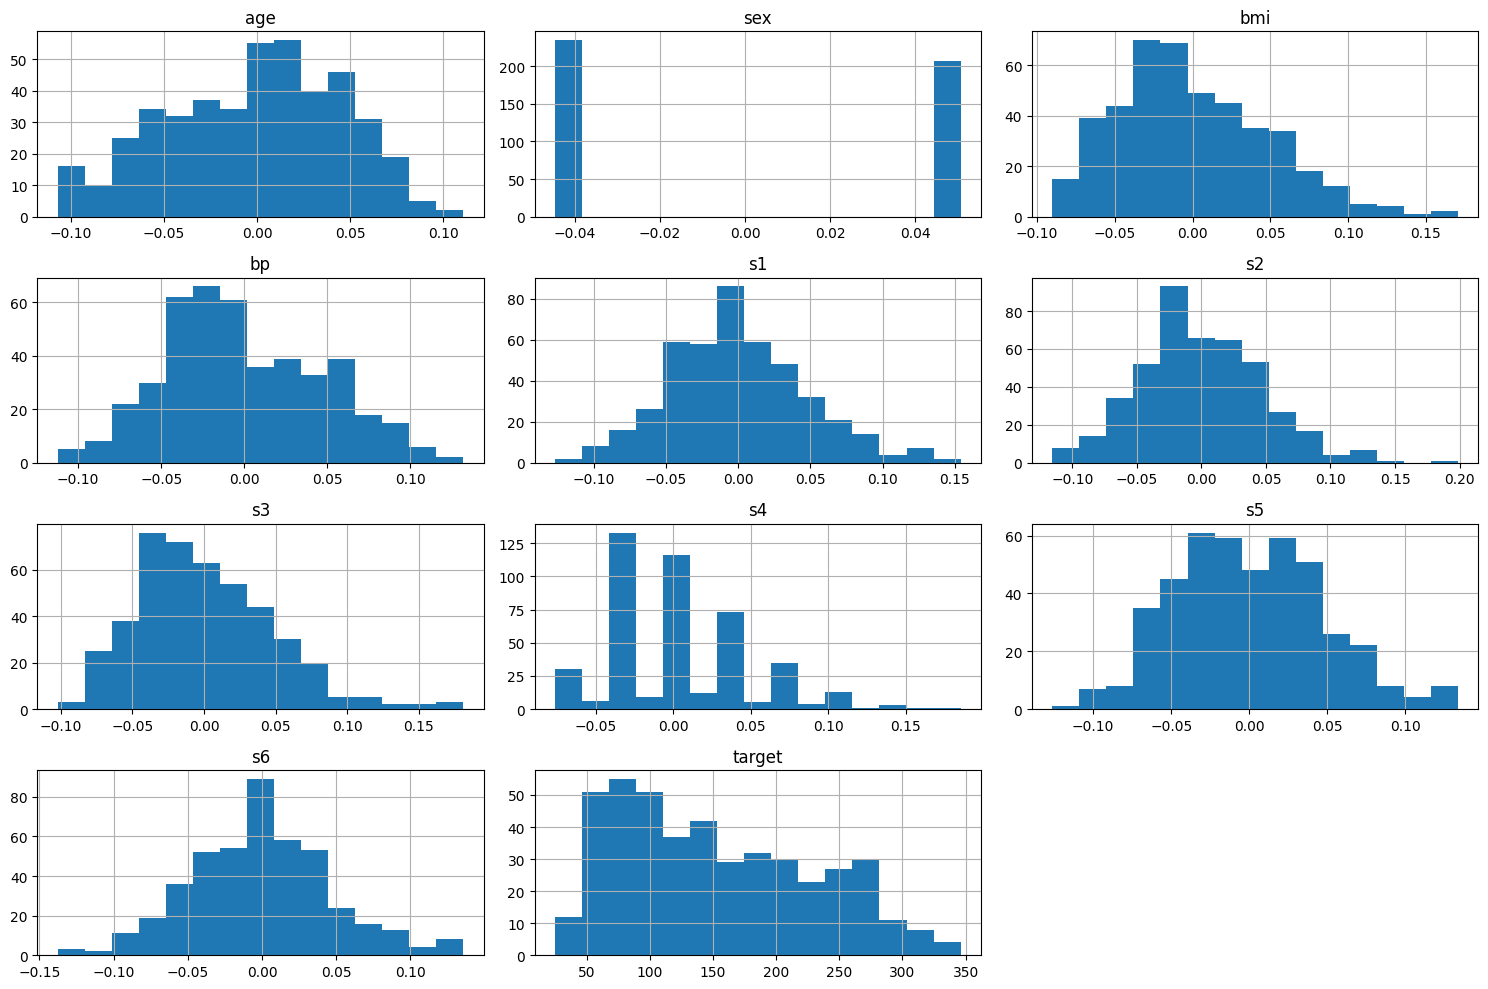

In [29]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

## Data Preprocessing

In [30]:
df_x = df.iloc[:,:-1].values
df_y = df.iloc[:,-1].values
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [31]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=SEED)
X_train

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numerical data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [32]:
y_test

array([170., 242.,  49., 257., 246., 141., 104., 214.,  60., 154.,  31.,
       142., 168., 229.,  51.,  69.,  73.,  95., 310., 125., 101., 158.,
       129.,  97., 220., 109., 246.,  37., 142., 245., 214., 262.,  59.,
       221.,  74., 122., 141., 272., 163., 142., 245., 317., 144., 109.,
       168.])

## Model Architecture (Lazy Predict)

In [33]:
# All the different regressors
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [34]:
# Choose regressors
#lazypredict.supervised.REGRESSORS = lazypredict.supervised.REGRESSORS[33:36]
#lazypredict.supervised.REGRESSORS

In [35]:
#regressor=['RandomForestRegressor', 'XGBRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor']
reg = LazyRegressor(verbose=2, ignore_warnings=True, custom_metric=None)

## Model Training

In [36]:
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

  5%|▍         | 2/42 [00:00<00:05,  6.88it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5080299398048433, 'Adjusted R-Squared': 0.3589481033820686, 'RMSE': 46.536044251310045, 'Time taken': 0.16999197006225586}
{'Model': 'BaggingRegressor', 'R-Squared': 0.34388706043594974, 'Adjusted R-Squared': 0.14506495753775273, 'RMSE': 53.74145598054719, 'Time taken': 0.1270768642425537}
{'Model': 'BayesianRidge', 'R-Squared': 0.5081459322788754, 'Adjusted R-Squared': 0.3590992450906558, 'RMSE': 46.53055799356572, 'Time taken': 0.01999044418334961}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.07208850421493374, 'Adjusted R-Squared': -0.39696380852248936, 'RMSE': 68.69663217893053, 'Time taken': 0.01467752456665039}
{'Model': 'DummyRegressor', 'R-Squared': -0.008647485268810096, 'Adjusted R-Squared': -0.3142982383805706, 'RMSE': 66.63307136098213, 'Time taken': 0.008581876754760742}
{'Model': 'ElasticNet', 'R-Squared': 0.4953730743760004, 'Adjusted R-Squared': 0.3424558241869097, 'RMSE': 47.13085699360165, 'Time taken': 0.01428627967

 17%|█▋        | 7/42 [00:00<00:02, 15.72it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5091864507385195, 'Adjusted R-Squared': 0.3604550721744346, 'RMSE': 46.481314182423276, 'Time taken': 0.1582167148590088}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.21904980943619412, 'Adjusted R-Squared': -0.5884588425986772, 'RMSE': 73.25391705319494, 'Time taken': 0.01363992691040039}


 21%|██▏       | 9/42 [00:00<00:03,  9.70it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.4242930890111333, 'Adjusted R-Squared': 0.24983644931753735, 'RMSE': 50.34088524522316, 'Time taken': 0.3633699417114258}
{'Model': 'GammaRegressor', 'R-Squared': 0.46670049599559915, 'Adjusted R-Squared': 0.30509458569123526, 'RMSE': 48.4513315340287, 'Time taken': 0.1621546745300293}


 26%|██▌       | 11/42 [00:01<00:03,  8.82it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.3127742879044584, 'Adjusted R-Squared': -0.7105846781785365, 'RMSE': 76.0177757032134, 'Time taken': 0.10850214958190918}


 29%|██▊       | 12/42 [00:01<00:04,  6.58it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3854121853725512, 'Adjusted R-Squared': 0.1991734536672637, 'RMSE': 52.01302345694182, 'Time taken': 0.32538318634033203}


 38%|███▊      | 16/42 [00:02<00:05,  4.80it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.32000067785329833, 'Adjusted R-Squared': 0.11394027720278266, 'RMSE': 54.71096396647089, 'Time taken': 1.1629385948181152}
{'Model': 'HuberRegressor', 'R-Squared': 0.4901772844901313, 'Adjusted R-Squared': 0.3356855525174438, 'RMSE': 47.37287232946697, 'Time taken': 0.034557342529296875}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4334210052006082, 'Adjusted R-Squared': 0.2617304007159441, 'RMSE': 49.94020970575259, 'Time taken': 0.021701812744140625}
{'Model': 'KernelRidge', 'R-Squared': -4.870199175974915, 'Adjusted R-Squared': -6.649047411118828, 'RMSE': 160.74835801378578, 'Time taken': 0.05026650428771973}
{'Model': 'Lars', 'R-Squared': 0.4896850573947773, 'Adjusted R-Squared': 0.33504416569622497, 'RMSE': 47.3957357533546, 'Time taken': 0.02547764778137207}
{'Model': 'LarsCV', 'R-Squared': 0.5022567580869619, 'Adjusted R-Squared': 0.35142547265876856, 'RMSE': 46.8082940079539, 'Time taken': 0.040910959243774414}
{'Mode

 55%|█████▍    | 23/42 [00:03<00:01,  9.57it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5010960685754453, 'Adjusted R-Squared': 0.34991305905285297, 'RMSE': 46.86283845495326, 'Time taken': 0.1629486083984375}
{'Model': 'LassoLars', 'R-Squared': 0.5024214164318705, 'Adjusted R-Squared': 0.3516400274718313, 'RMSE': 46.800551046227206, 'Time taken': 0.02167820930480957}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5001001181059808, 'Adjusted R-Squared': 0.3486153054108234, 'RMSE': 46.909590738458604, 'Time taken': 0.048508405685424805}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5026543238071075, 'Adjusted R-Squared': 0.3519435128395644, 'RMSE': 46.78959652596908, 'Time taken': 0.029679536819458008}
{'Model': 'LinearRegression', 'R-Squared': 0.4896850573947762, 'Adjusted R-Squared': 0.33504416569622353, 'RMSE': 47.39573575335465, 'Time taken': 0.016127586364746094}
{'Model': 'LinearSVR', 'R-Squared': 0.3045758454528078, 'Adjusted R-Squared': 0.09384125316577985, 'RMSE': 55.32800521103206, 'Time taken': 0.02342963218688965}


 74%|███████▍  | 31/42 [00:04<00:01,  7.90it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.2783645290461814, 'Adjusted R-Squared': -1.9687780226965392, 'RMSE': 100.1455675671883, 'Time taken': 1.213986873626709}
{'Model': 'NuSVR', 'R-Squared': 0.2117324322457459, 'Adjusted R-Squared': -0.027136527679785694, 'RMSE': 58.90565047563986, 'Time taken': 0.02851271629333496}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.414930728283895, 'Adjusted R-Squared': 0.23763700958204503, 'RMSE': 50.74856560234433, 'Time taken': 0.01791691780090332}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.43781918708075496, 'Adjusted R-Squared': 0.26746136498401407, 'RMSE': 49.74599667311397, 'Time taken': 0.019678592681884766}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5010701273119524, 'Adjusted R-Squared': 0.34987925680042287, 'RMSE': 46.8640567911513, 'Time taken': 0.02137899398803711}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5327965919183926, 'Adjusted R-Squared': 0.39121980159063274, 'RMSE': 45.349565247672956, 'Time take

 93%|█████████▎| 39/42 [00:05<00:00,  8.50it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4286764469237556, 'Adjusted R-Squared': 0.2555480975067119, 'RMSE': 50.14887456817496, 'Time taken': 0.7085292339324951}
{'Model': 'Ridge', 'R-Squared': 0.49528288341181115, 'Adjusted R-Squared': 0.3423383026275115, 'RMSE': 47.13506860747242, 'Time taken': 0.018694400787353516}
{'Model': 'RidgeCV', 'R-Squared': 0.49528288341194426, 'Adjusted R-Squared': 0.34233830262768494, 'RMSE': 47.13506860746621, 'Time taken': 0.015985965728759766}
{'Model': 'SGDRegressor', 'R-Squared': 0.5075205005936959, 'Adjusted R-Squared': 0.3582842886523917, 'RMSE': 46.560132253296494, 'Time taken': 0.01079106330871582}
{'Model': 'SVR', 'R-Squared': 0.2258190986415325, 'Adjusted R-Squared': -0.008781174497397126, 'RMSE': 58.37694364651823, 'Time taken': 0.03338885307312012}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4896850573947762, 'Adjusted R-Squared': 0.33504416569622353, 'RMSE': 47.39573575335465, 'Time taken': 0.02066636085510254}
{'Model': '

100%|██████████| 42/42 [00:06<00:00,  6.20it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
{'Model': 'LGBMRegressor', 'R-Squared': 0.3236746912290692, 'Adjusted R-Squared': 0.1187276279651508, 'RMSE': 54.562963039275054, 'Time taken': 0.43538570404052734}


In [37]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.39,0.53,45.35,0.03
ElasticNetCV,0.36,0.51,46.48,0.16
BayesianRidge,0.36,0.51,46.53,0.02
AdaBoostRegressor,0.36,0.51,46.54,0.17
SGDRegressor,0.36,0.51,46.56,0.01
LassoLarsIC,0.35,0.50,46.79,0.03
Lasso,0.35,0.50,46.80,0.02
LassoLars,0.35,0.50,46.80,0.02
LarsCV,0.35,0.50,46.81,0.04


## Results

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extract models from the LazyRegressor/Classifier
fitted_models = reg.models

# Dictionary to store test performance metrics
test_results = {}

# Loop through the models and evaluate them on the test set
for model_name, model in fitted_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the dictionary
    test_results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Convert to a DataFrame for easier viewing
import pandas as pd
test_results_df = pd.DataFrame(test_results).T
test_results_df.sort_values(by='R2', ascending=False, inplace=True)

# Display the test results
print(test_results_df)

                                   MSE   RMSE    MAE    R2
ExtraTreesRegressor            2850.04  53.39  46.58  0.50
PoissonRegressor               2991.08  54.69  46.48  0.48
AdaBoostRegressor              3064.49  55.36  47.95  0.47
HuberRegressor                 3090.09  55.59  47.95  0.46
PassiveAggressiveRegressor     3104.54  55.72  49.04  0.46
TransformedTargetRegressor     3147.86  56.11  48.43  0.45
LinearRegression               3147.86  56.11  48.43  0.45
Lars                           3147.86  56.11  48.43  0.45
RidgeCV                        3160.75  56.22  48.64  0.45
Ridge                          3160.75  56.22  48.64  0.45
RandomForestRegressor          3205.78  56.62  48.89  0.44
BayesianRidge                  3208.57  56.64  49.28  0.44
ElasticNetCV                   3213.19  56.68  49.34  0.44
LassoLarsIC                    3227.66  56.81  49.43  0.44
Lasso                          3231.37  56.85  49.45  0.44
LassoLars                      3231.38  56.85  49.45  0.